# Voting
Voting is an ensemble learning method where multiple machine learning models (classifiers or regressors) are combined to make a final prediction. There are two types of voting:

- **Hard Voting**: The final prediction is based on the majority vote from the base models. The class that gets the most votes is selected as the prediction.
- **Soft Voting**: The final prediction is based on the average of predicted class probabilities. The class with the highest averaged probability is selected.

Hard Voting Classifier:
Accuracy: 1.0
Confusion Matrix:
 [[ 7  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Soft Voting Classifier:
Accuracy: 0.8
Confusion Matrix:
 [[7 0]
 [4 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



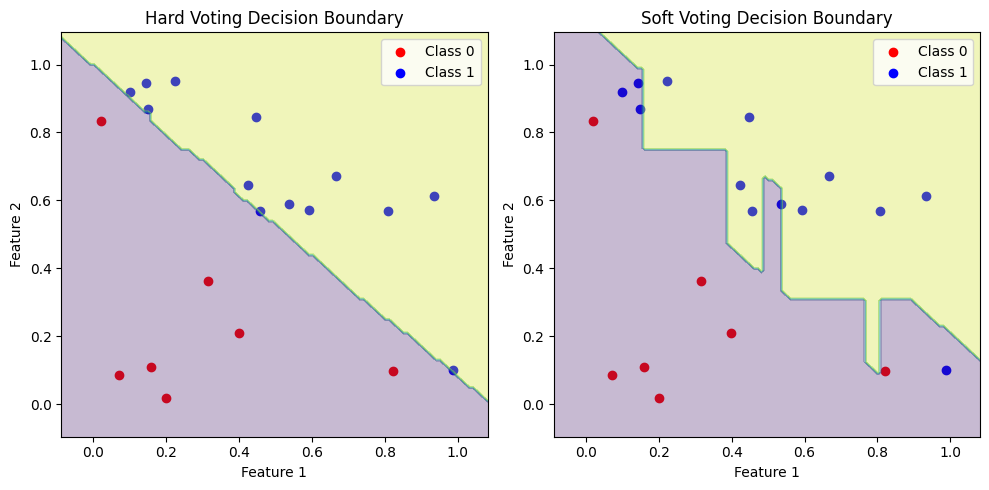

In [1]:
# Voting (Hard and Soft) Classification Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if the sum of the features is greater than 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define base classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = SVC(probability=True, kernel='linear', random_state=0)  # Enable probability=True for soft voting
clf3 = DecisionTreeClassifier(random_state=0)

# Create a Voting Classifier (Hard Voting)
voting_hard = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('dt', clf3)], voting='hard')
voting_hard.fit(X_train, y_train)

# Create a Voting Classifier (Soft Voting)
voting_soft = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('dt', clf3)], voting='soft')
voting_soft.fit(X_train, y_train)

# Predict using Hard Voting
y_pred_hard = voting_hard.predict(X_test)

# Predict using Soft Voting
y_pred_soft = voting_soft.predict(X_test)

# Evaluate Hard Voting performance
print("Hard Voting Classifier:")
accuracy_hard = accuracy_score(y_test, y_pred_hard)
conf_matrix_hard = confusion_matrix(y_test, y_pred_hard)
class_report_hard = classification_report(y_test, y_pred_hard)
print("Accuracy:", accuracy_hard)
print("Confusion Matrix:\n", conf_matrix_hard)
print("Classification Report:\n", class_report_hard)

# Evaluate Soft Voting performance
print("\nSoft Voting Classifier:")
accuracy_soft = accuracy_score(y_test, y_pred_soft)
conf_matrix_soft = confusion_matrix(y_test, y_pred_soft)
class_report_soft = classification_report(y_test, y_pred_soft)
print("Accuracy:", accuracy_soft)
print("Confusion Matrix:\n", conf_matrix_soft)
print("Classification Report:\n", class_report_soft)

# Visualize the decision boundaries for Hard Voting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.title('Hard Voting Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for decision boundary visualization (Hard Voting)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = voting_hard.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()

# Visualize the decision boundaries for Soft Voting
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.title('Soft Voting Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for decision boundary visualization (Soft Voting)
Z = voting_soft.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

### Explanation of Code Components

1. **Data Generation**: Synthetic binary classification data is generated where points are classified based on the sum of two features.

2. **Base Classifiers**: Three different classifiers are used:
   - **Logistic Regression**.
   - **Support Vector Classifier (SVC)** with probability enabled for soft voting.
   - **Decision Tree Classifier**.

3. **Hard Voting**: In the `VotingClassifier`, `voting='hard'` aggregates the majority class from the base models to make a final prediction.

4. **Soft Voting**: In `voting='soft'`, the average class probabilities from the base models are used to make the final prediction. For soft voting, the `SVC` classifier requires the `probability=True` parameter to compute class probabilities.

5. **Model Evaluation**: Both hard and soft voting classifiers are evaluated using accuracy, confusion matrix, and classification report.

6. **Visualization**: The decision boundaries for both classifiers are plotted using a contour plot to visualize the predictions and how the different voting strategies separate the classes.

### Key Differences Between Hard and Soft Voting
- **Hard Voting**: More suited when the base models are diverse and you rely on their majority decisions. It’s faster since it doesn’t require probability estimates.
- **Soft Voting**: More suited when the base models are well-calibrated and their class probability estimates can be averaged to get more nuanced predictions.

### Note
- Voting classifiers are particularly effective when combining models that have complementary strengths (e.g., a tree-based model, a linear model, and a kernel-based model).